In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.preprocessing import LabelEncoder

In [61]:
df = pd.read_csv(r'C:\Users\narut\Desktop\Machine-Learning-and-Neural-Network\Mall_Customers.csv')

print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
df = df.drop(columns=['CustomerID'])
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [9]:
# import the kneed module for Elbow Method
from kneed import KneeLocator

# Applying the Elbow method to determine the number of clusters
wcss = []

for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



In [13]:
# Using KneeLocator to find the elbow
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print('The Knee located at figure:', kl.elbow)

The Knee located at figure: 6


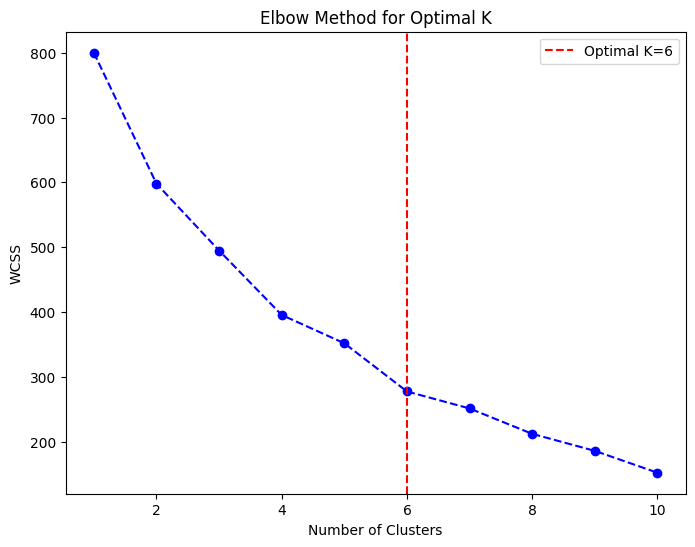

In [14]:
# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, 'o--', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=kl.elbow, color='red', linestyle='--', label=f"Optimal K={kl.elbow}")
plt.legend()
plt.show()

In [38]:
# K-means clustering with Euclidean distance
euclidean_matrix = euclidean_distances(X_scaled)
kmeans_euclidean = KMeans(n_clusters=6, random_state=42)
kmeans_euclidean_labels = kmeans_euclidean.fit_predict(euclidean_matrix)

# K-means clustering with Cosine similarity
cosine_similarity_matrix = 1 - cosine_similarity(X_scaled)
kmeans_cosine = KMeans(n_clusters=6, random_state=42)
kmeans_cosine_labels = kmeans_cosine.fit_predict(cosine_similarity_matrix)


In [39]:
# Evaluate the clustering performance using silhouette score
silhouette_euclidean = silhouette_score(X_scaled, kmeans_euclidean_labels, metric="euclidean")
silhouette_cosine = silhouette_score(X_scaled, kmeans_cosine_labels, metric="cosine")

print(f"Silhouette Score with Euclidean Distance: {silhouette_euclidean}")
print(f"Silhouette Score with Cosine Similarity: {silhouette_cosine}")



Silhouette Score with Euclidean Distance: 0.26573406555263723
Silhouette Score with Cosine Similarity: 0.5311365676680234


In [32]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

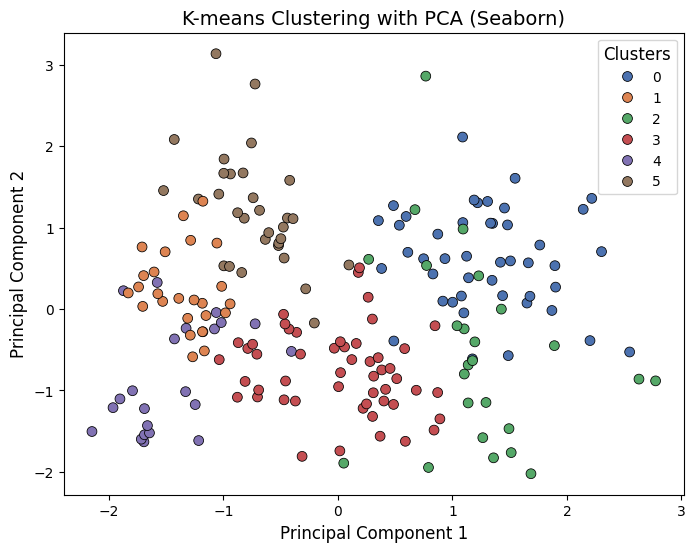

In [59]:
df_pca = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': kmeans_euclidean_labels
})
palette = sns.color_palette('deep', len(np.unique(kmeans_euclidean_labels)))

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot( data=df_pca, x='PCA1',  y='PCA2',  hue='Cluster',  palette=palette,  s=50, edgecolor='k')

# Add plot customization
plt.title("K-means Clustering with PCA (Seaborn)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)

# Display the legend
plt.legend(title='Clusters', loc='best', fontsize=10, title_fontsize=12)
plt.show()

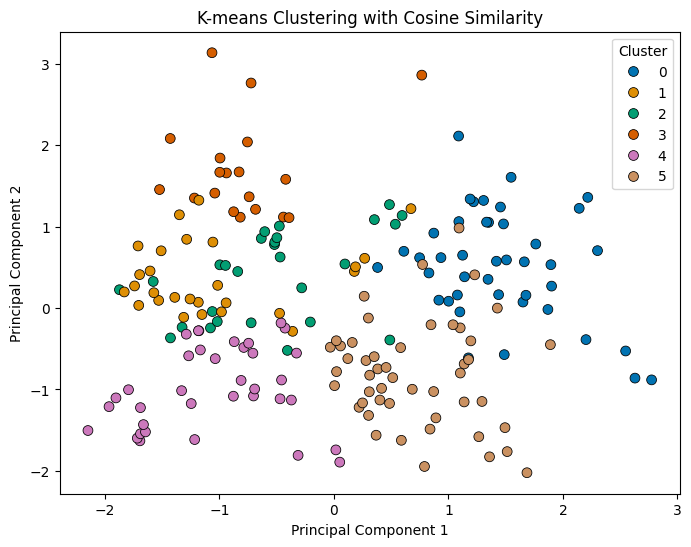

In [56]:
df_pca = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': kmeans_cosine_labels
})
palette = sns.color_palette('colorblind', len(np.unique(kmeans_cosine_labels)))
plt.figure(figsize=(8, 6))
sns.scatterplot( data=df_pca, x='PCA1',  y='PCA2',  hue='Cluster',  palette=palette,  s=50, edgecolor='k')
plt.title("K-means Clustering with Cosine Similarity")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()